In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/daily-temperature-of-major-cities/city_temperature.csv


**Read CSV**

In [2]:
temp_data = pd.read_csv('../input/daily-temperature-of-major-cities/city_temperature.csv', dtype={'Region': 'str', 'Country': 'str', 'State': 'str', 'City': 'str', 'Month': 'int', 'Day': 'int', 'Year': 'int', 'AvgTemperature': 'float'}, encoding  = 'utf-8')

**EDA**

In [3]:
temp_data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


**Cleaning of data**

**Checking for null and duplicates**

In [5]:
print(temp_data.isnull().sum())
print("")
print("The duplicated values are : {}".format(len(temp_data[temp_data.duplicated()])))

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

The duplicated values are : 20715


**Removing null and duplicate**

In [6]:
temp_data = temp_data.drop(['State'], axis = 1)
temp_data = temp_data.drop_duplicates()

In [7]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,2885424.0,6.469008,3.456462,1.0,3.0,6.0,9.0,12.0
Day,2885424.0,15.716709,8.800542,0.0,8.0,16.0,23.0,31.0
Year,2885424.0,2006.706901,19.657664,200.0,2001.0,2007.0,2013.0,2020.0
AvgTemperature,2885424.0,56.018404,32.145699,-99.0,45.8,62.5,75.6,110.0


**Removing outliers**

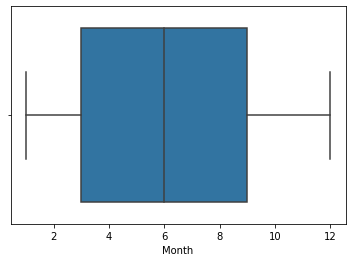

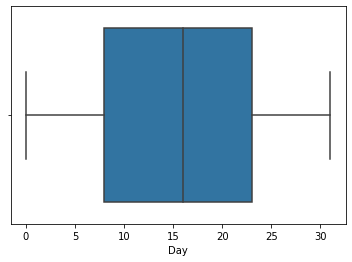

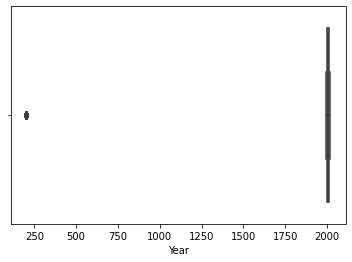

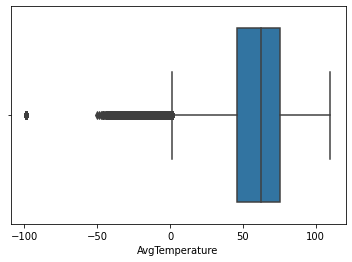

In [8]:
for i in temp_data[['Month', 'Day', 'Year', 'AvgTemperature']]:
    plt.figure()
    sns.boxplot(temp_data[i])

In [9]:
temp_data.groupby('Year')['AvgTemperature'].count()

Year
200         60
201        235
1995    117880
1996    118210
1997    117921
1998    118334
1999    118616
2000    118946
2001    118618
2002    118601
2003    118405
2004    117910
2005    117158
2006    116910
2007    114677
2008    113818
2009    113508
2010    114526
2011    112308
2012    111256
2013    110284
2014    108284
2015    106763
2016    106499
2017    106209
2018    105657
2019    105290
2020     38541
Name: AvgTemperature, dtype: int64

In [10]:
temp_data = temp_data[temp_data['Day'] > 0]
temp_data = temp_data[temp_data['Year'] > 1994]
temp_data = temp_data[temp_data['Year'] < 2020]
temp_data = temp_data[temp_data['AvgTemperature'] > -70]

**Correcting formats for future use**

In [11]:
temp_data['AvgTemperature'] = (temp_data['AvgTemperature'] - 32)*(5/9)
temp_data['Date'] = pd.to_datetime(temp_data[['Year','Month','Day']])

**Finalised cleaned data**

In [12]:
temp_data

,Region,Country,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Algiers,1,1,1995,17.888889,1995-01-01
1,Africa,Algeria,Algiers,1,2,1995,9.666667,1995-01-02
2,Africa,Algeria,Algiers,1,3,1995,9.333333,1995-01-03
3,Africa,Algeria,Algiers,1,4,1995,8.000000,1995-01-04
4,Africa,Algeria,Algiers,1,5,1995,8.833333,1995-01-05
...,...,...,...,...,...,...,...,...
2906322,North America,US,San Juan Puerto Rico,7,27,2013,28.000000,2013-07-27
2906323,North America,US,San Juan Puerto Rico,7,28,2013,27.555556,2013-07-28
2906324,North America,US,San Juan Puerto Rico,7,29,2013,29.000000,2013-07-29
2906325,North America,US,San Juan Puerto Rico,7,30,2013,28.777778,2013-07-30


**Visualization and analysis of data**

In [13]:
for i in temp_data:
    print(i ,': ', temp_data[i].nunique())

Region :  7
Country :  125
City :  321
Month :  12
Day :  31
Year :  25
AvgTemperature :  1514
Date :  9126


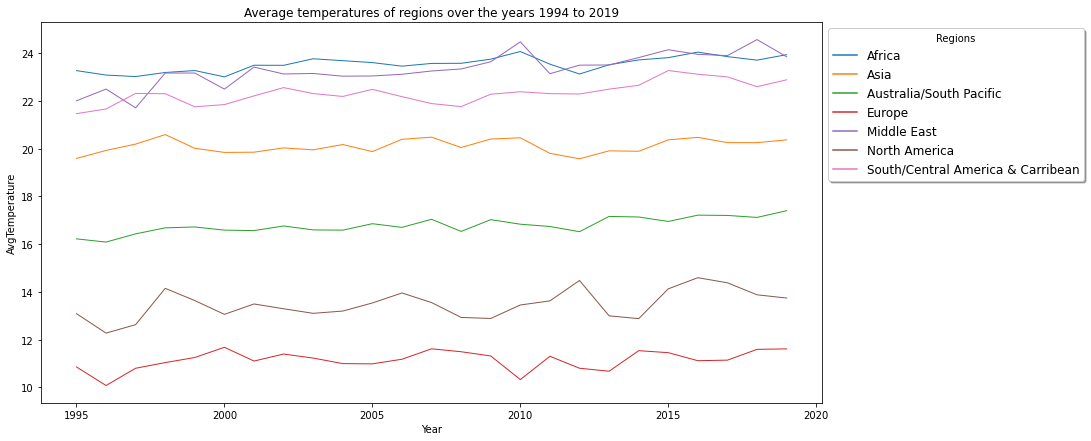

In [14]:
region = temp_data[['Region', 'Year', 'AvgTemperature']].groupby(['Region', 'Year']).mean()
plt.figure(figsize = (14, 7))
plt.title('Average temperatures of regions over the years 1994 to 2019')
sns.lineplot(x = 'Year', y = 'AvgTemperature', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 1, data = region)
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Regions')
plt.show()

In [15]:
data = temp_data[['Country','Year','AvgTemperature']].groupby(['Country','Year']).mean().reset_index()
px.choropleth(data_frame=data,locations="Country",locationmode='country names',animation_frame="Year",color='AvgTemperature',color_continuous_scale = 'Turbo',title="Average temperature of countries over the years 1995 to 2019")

In [16]:
data1 = temp_data.sort_values(by = ['AvgTemperature'], ascending  = False).head(1)
data2 = temp_data.sort_values(by = ['AvgTemperature'], ascending = True).head(1)
hl_data = pd.concat([data1, data2])
hl_data.index = ['Highest', 'Lowest']
hl_data

,Region,Country,City,Month,Day,Year,AvgTemperature,Date
Highest,Middle East,Kuwait,Kuwait,8,1,2012,43.333333,2012-08-01
Lowest,North America,US,Fairbanks,12,31,1999,-45.555556,1999-12-31


**Narrowing analysis to Pakistan**

In [17]:
Pakistan_filter = temp_data['Country'] == 'Pakistan'
Pak_data = temp_data[Pakistan_filter].reset_index(drop = True)

In [18]:
Pak_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,17815.0,6.549312,3.444898,1.000000,4.000000,7.000000,10.000000,12.000000
Day,17815.0,15.725344,8.802624,1.000000,8.000000,16.000000,23.000000,31.000000
Year,17815.0,2006.948190,7.137525,1995.000000,2001.000000,2007.000000,2013.000000,2019.000000
AvgTemperature,17815.0,24.465192,6.803561,2.333333,19.833333,26.777778,29.777778,39.111111


In [19]:
Pak_data.City.value_counts()

Karachi      9011
Islamabad    8804
Name: City, dtype: int64

Text(0, 0.5, 'AvgTemperature')

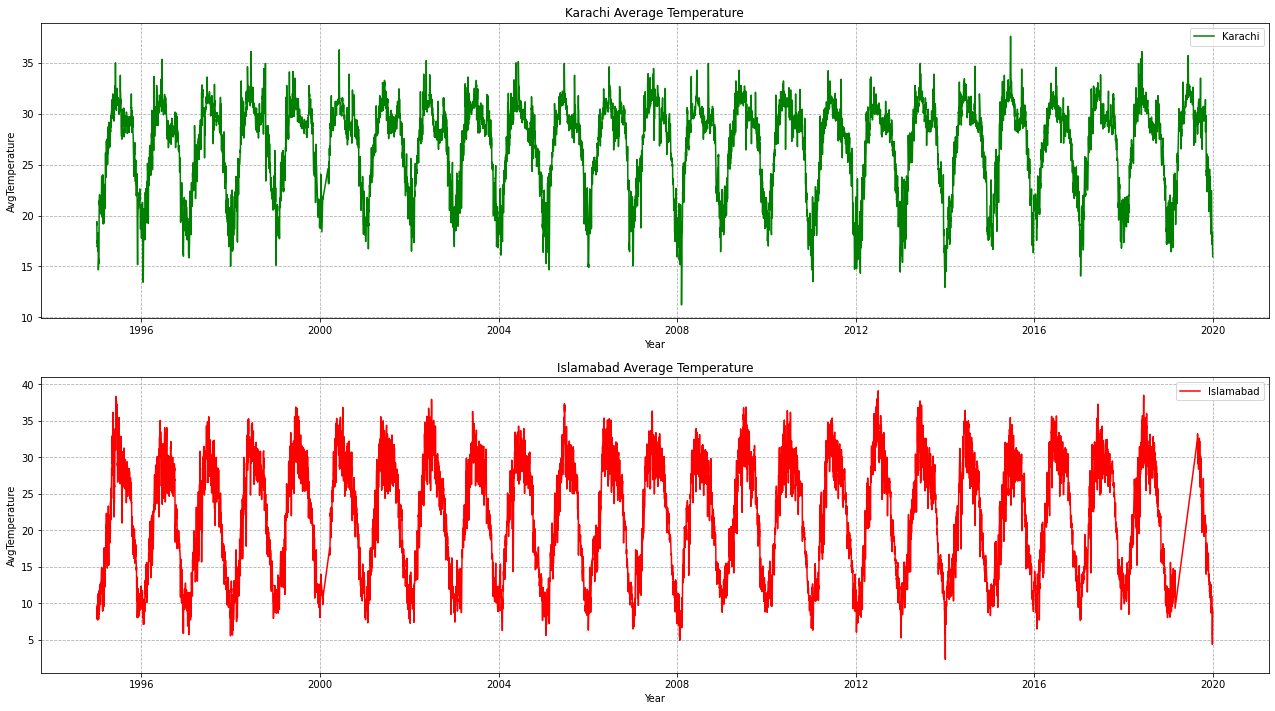

In [20]:
kar_data = temp_data[temp_data['City'] == 'Karachi']
Isl_data = temp_data[temp_data['City'] == 'Islamabad']

plt.figure(figsize = (22,25))
plt.subplot(4,1,1)
plt.plot(kar_data['Date'], kar_data['AvgTemperature'], 'g' ,label = 'Karachi')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Karachi Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')

plt.subplot(4,1,2)
plt.plot(Isl_data['Date'], Isl_data['AvgTemperature'], 'r' ,label = 'Islamabad')
plt.grid(linestyle = '--')
plt.legend(loc = 'best')
plt.title('Islamabad Average Temperature')
plt.xlabel('Year')
plt.ylabel('AvgTemperature')